# Analyse de la donnée - Statistiques

Ce playbook a pour objectif de comprendre notre dataset. Pour cela, nous calculons des statistiques descriptives sur dessus telles que la moyenne, la médiane, l'écart type, le minimum et le maximum certaines les variables numériques comme la durée moyenne du trajet, le nombre de retards au départ, etc.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [41]:
# Lecture de la base de données
script_dir = os.path.abspath('')
relative_path = '../dataset/regularite-mensuelle-tgv-aqst.csv'
csv_path = os.path.join(script_dir, relative_path)
data = pd.read_csv(csv_path, delimiter=";")

## L'importance de la gare dans le retard du train

Qu'elle est l'importance d'une gare dans le retard ? Est-ce qu'une gare qui accumule beaucoup de retards les accumules à cause des retards au départ depuis les autres gare ou est ce seulement à leur arrivée dans cette gare que les trains ont pris du retard ?

### Corrélatinon entre les retards à l'arrivée et au départ en fonction de la gare

C:\Users\Romain\AppData\Local\Temp\ipykernel_21640\2222215266.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  departure_vs_arrival_correlation = data[['gare_depart', 'gare_arrivee', 'nb_train_depart_retard', 'nb_train_retard_arrivee']].corr()



Matrice de Corrélation entre Gares de Départ et d'Arrivée:
                         nb_train_depart_retard  nb_train_retard_arrivee
nb_train_depart_retard                   1.0000                   0.6324
nb_train_retard_arrivee                  0.6324                   1.0000


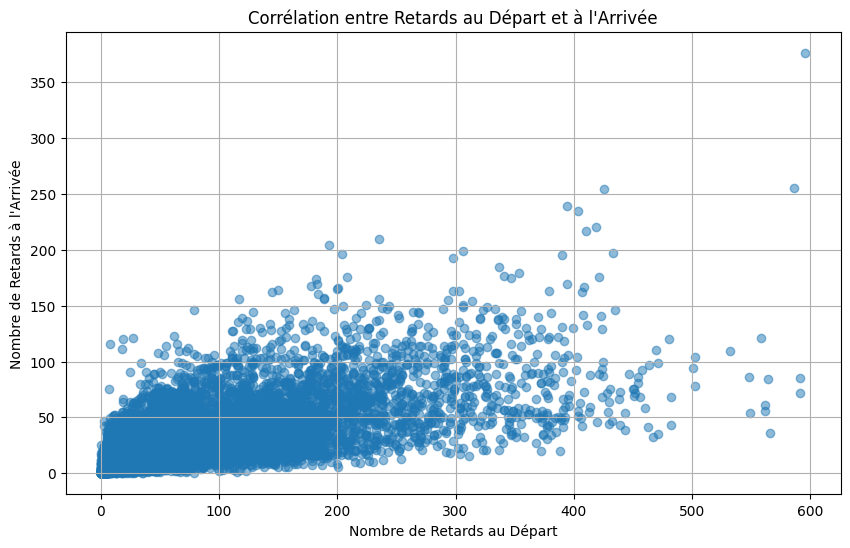

In [42]:
# Analyse des gares de départ
departure_stats = data.groupby('gare_depart').agg({
    'nb_train_depart_retard': 'sum',
    'nb_train_retard_arrivee': 'sum',
    'nb_train_prevu': 'count'
}).reset_index()

# Renommer les colonnes
departure_stats.columns = ['Gare de Départ', 'Nombre de Retards au Départ', 'Nombre de Retards à l\'Arrivée', 'Nombre de Trajets']

# # Afficher les statistiques des gares de départ
# print("Statistiques des Gares de Départ:")
# print(departure_stats)

# Analyse des gares d'arrivée
arrival_stats = data.groupby('gare_arrivee').agg({
    'nb_train_depart_retard': 'sum',
    'nb_train_retard_arrivee': 'sum',
    'nb_train_prevu': 'count'
}).reset_index()

# Renommer les colonnes
arrival_stats.columns = ['Gare d\'Arrivée', 'Nombre de Retards au Départ', 'Nombre de Retards à l\'Arrivée', 'Nombre de Trajets']

# # Afficher les statistiques des gares d'arrivée
# print("\nStatistiques des Gares d'Arrivée:")
# print(arrival_stats)

# Corrélation entre les gares de départ et d'arrivée
departure_vs_arrival_correlation = data[['gare_depart', 'gare_arrivee', 'nb_train_depart_retard', 'nb_train_retard_arrivee']].corr()

# Afficher la matrice de corrélation
print("\nMatrice de Corrélation entre Gares de Départ et d'Arrivée:")
print(departure_vs_arrival_correlation)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(data['nb_train_depart_retard'], data['nb_train_retard_arrivee'], alpha=0.5)
plt.xlabel('Nombre de Retards au Départ')
plt.ylabel('Nombre de Retards à l\'Arrivée')
plt.title('Corrélation entre Retards au Départ et à l\'Arrivée')
plt.grid(True)
plt.show()


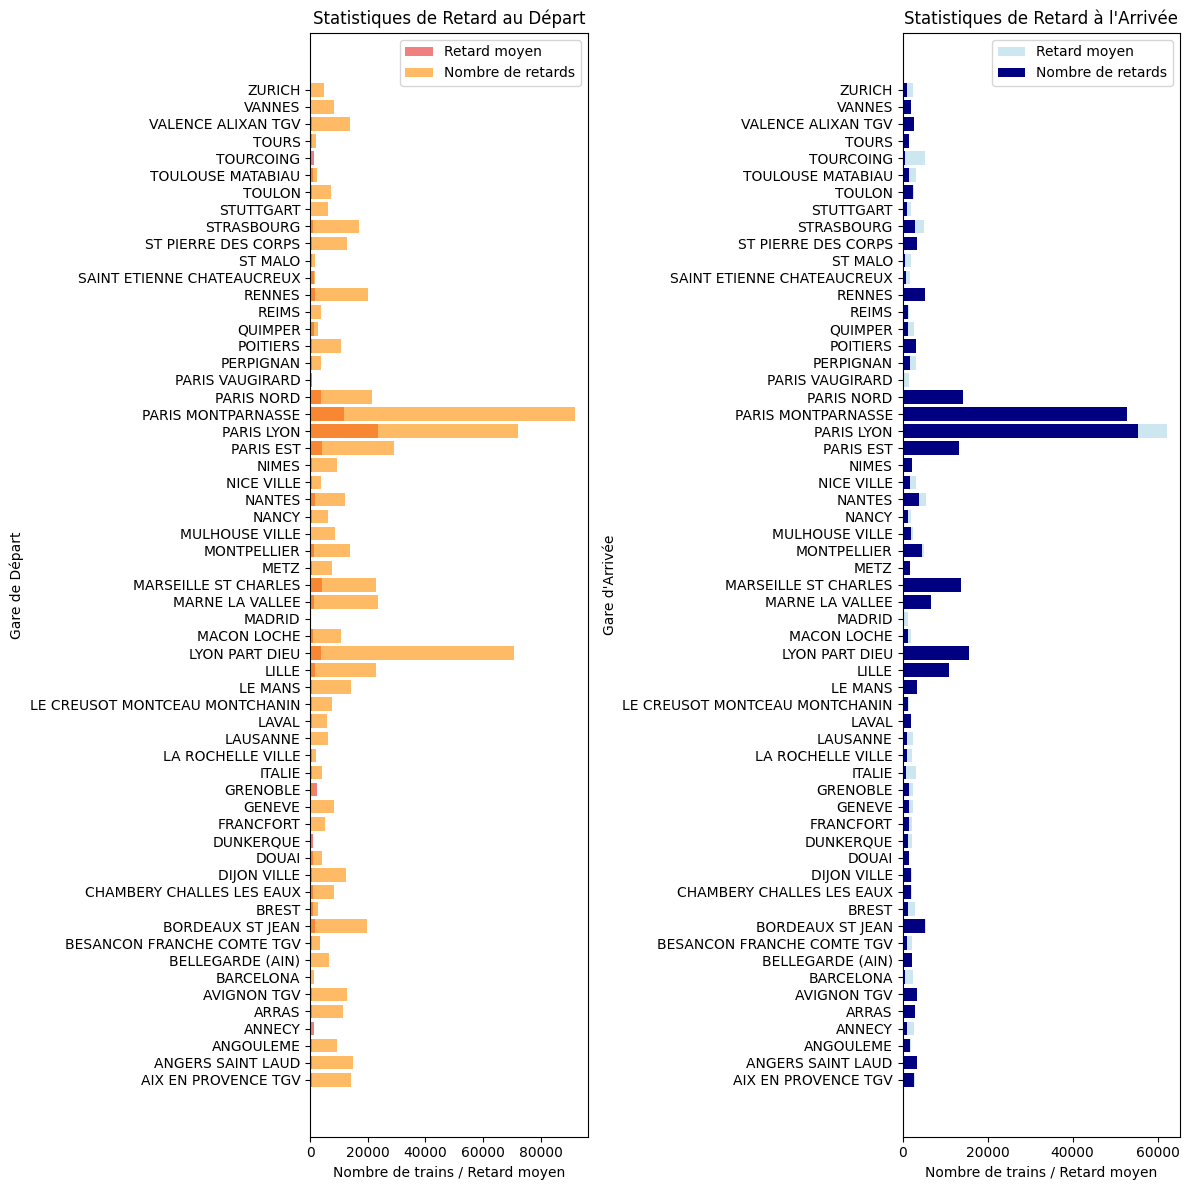

In [44]:
# Create two DataFrames, one grouped by 'gare_depart' and the other by 'gare_arrivee'
df_depart = data.groupby('gare_depart')[['nb_train_depart_retard', 'retard_moyen_depart']].sum().reset_index()
df_arrivee = data.groupby('gare_arrivee')[['nb_train_retard_arrivee', 'retard_moyen_arrivee']].sum().reset_index()

# Create subplots for the two histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

# First Histogram (Nombre de trains en retard au départ et Retard moyen au départ)
ax1.barh(df_depart['gare_depart'], df_depart['retard_moyen_depart'], color='lightcoral', label='Retard moyen')
ax1.barh(df_depart['gare_depart'], df_depart['nb_train_depart_retard'], color='darkorange', alpha=0.6, label='Nombre de retards')
ax1.set_xlabel('Nombre de trains / Retard moyen')
ax1.set_ylabel('Gare de Départ')
ax1.set_title('Statistiques de Retard au Départ')
ax1.legend()

# Second Histogram (Nombre de trains en retard à l'arrivée et Retard moyen à l'arrivée)
ax2.barh(df_arrivee['gare_arrivee'], df_arrivee['retard_moyen_arrivee'], color='lightblue', alpha=0.6, label='Retard moyen')
ax2.barh(df_arrivee['gare_arrivee'], df_arrivee['nb_train_retard_arrivee'], color='navy', label='Nombre de retards')
ax2.set_xlabel('Nombre de trains / Retard moyen')
ax2.set_ylabel('Gare d\'Arrivée')
ax2.set_title('Statistiques de Retard à l\'Arrivée')
ax2.legend()

plt.tight_layout()
plt.show()


C:\Users\Romain\AppData\Local\Temp\ipykernel_21640\1552895046.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


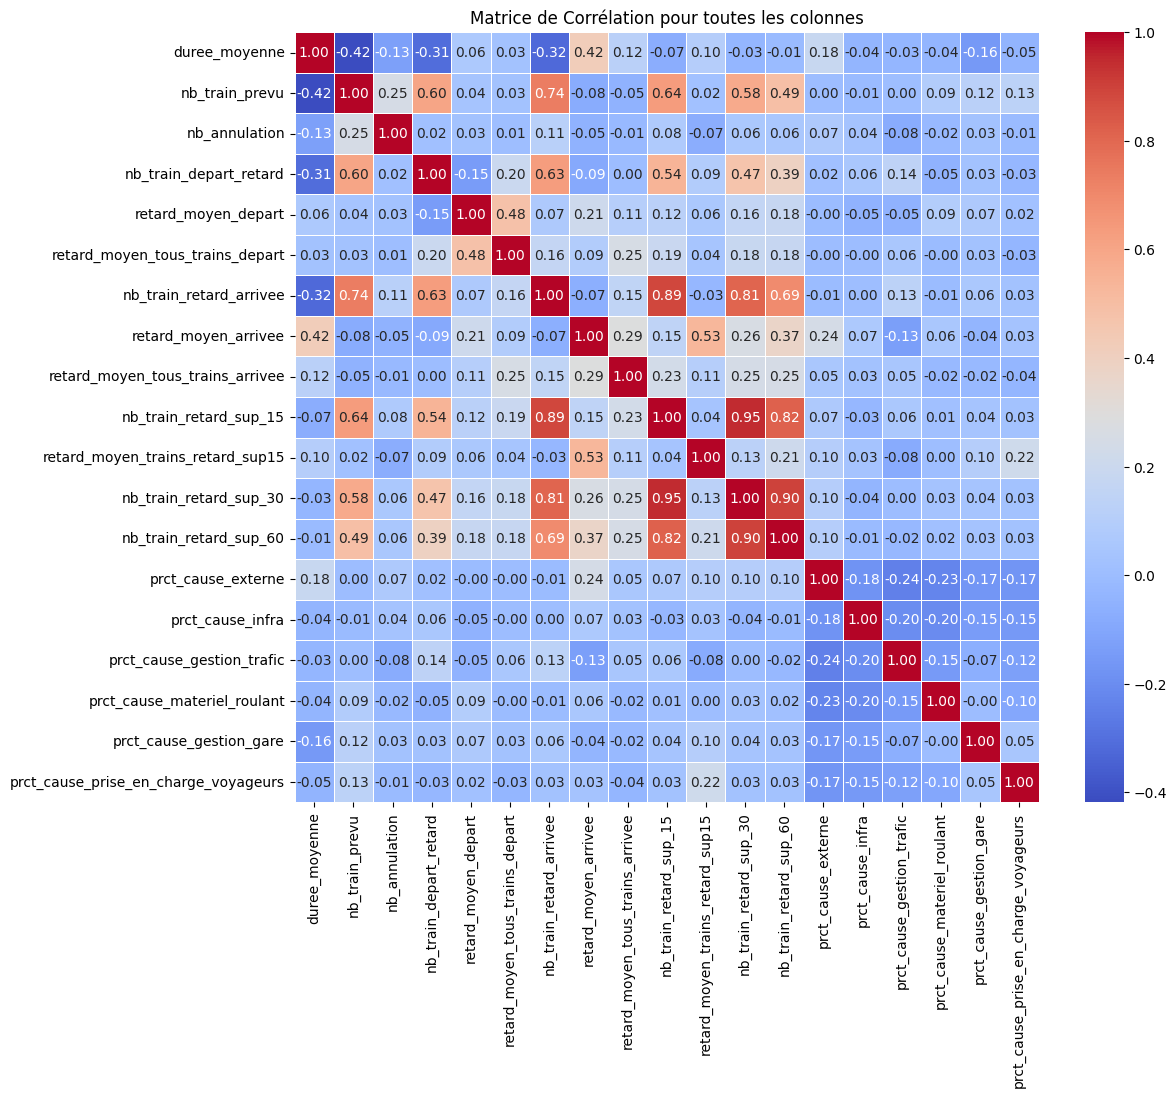

In [47]:
df = data.drop(['commentaire_annulation', 'commentaire_retards_depart'], axis=1)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation pour toutes les colonnes')
plt.show()

## Analyse

En analysant la matrice de corrélation, il semble exister une léggère correlation entre le nombre de retard au départ et le nombre de retard à arrivé. C'est aussi ce qui semble se dessiné sur les histogrammes. On remarques des similarités dans les patterns des gare de départ et celle d'arrivée pour leur nombre de retard. Cependant, rien de semble se dessiner concrétement pour ce qui concerne la durée de ces retards.

# Ajout de features

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Lecture de la base de données
script_dir = os.path.abspath('')
relative_path = '../dataset/retard_ferie_vacation_greves.csv'
csv_path = os.path.join(script_dir, relative_path)
data_rich = pd.read_csv(csv_path, delimiter=",")

C:\Users\Romain\AppData\Local\Temp\ipykernel_10400\2096011927.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


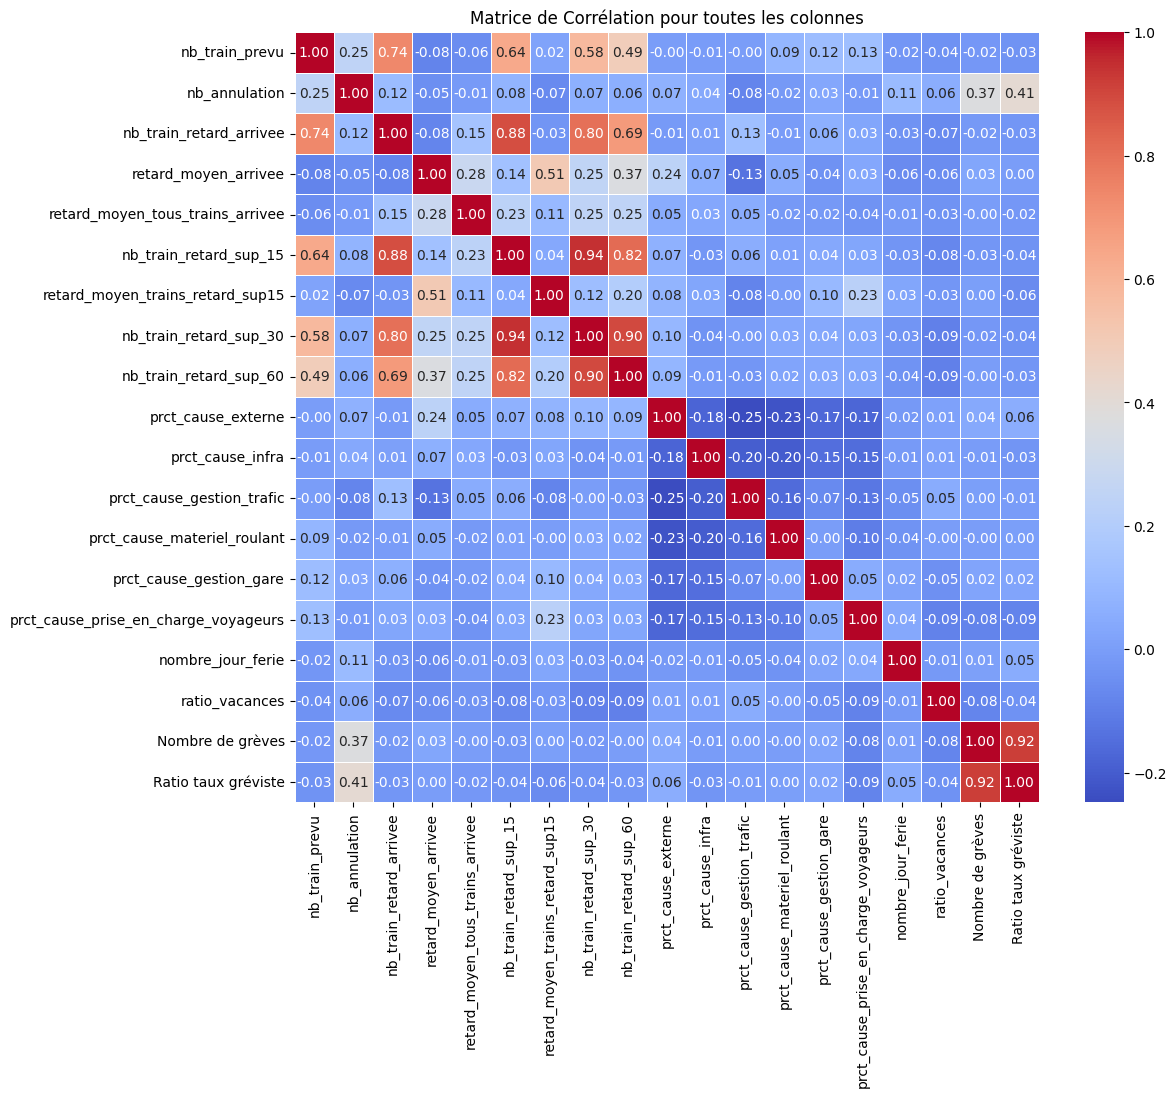

In [5]:
# Matrice de correlation entre la variable retard_moyen_arrivee (celle qu'on veut prédire) et les nouvelles features

columns_to_remove = [
    'commentaire_annulation',
    'commentaire_retards_depart',
    'commentaires_retard_arrivee',
    'retard_moyen_depart',
    'retard_moyen_tous_trains_depart',
    'nb_train_depart_retard',
    # 'retard_moyen_arrivee', # this is the feature we try to predict so we will remove it late,
    # 'nb_train_retard_arrivee',
    # 'retard_moyen_tous_trains_arrivee',
    # 'nb_train_retard_sup_15',
    # 'retard_moyen_trains_retard_sup15',
    # 'nb_train_retard_sup_30',
    # 'nb_train_retard_sup_60',
    # 'prct_cause_externe',
    # 'prct_cause_infra',
    # 'prct_cause_gestion_trafic',
    # 'prct_cause_materiel_roulant',
    # 'prct_cause_gestion_gare',
    # 'prct_cause_prise_en_charge_voyageurs',
    'jours_vacances',
    'total_jours',
    'annee',
    'mois',
    'duree_moyenne',
    'Motif exprimé'
]
df = data_rich.drop(columns_to_remove, axis=1)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation pour toutes les colonnes')
plt.show()